In [6]:
import pandas as pd
import re
import os

# Passo 1: Carregar os dados 🧠


### Define o caminho relativo para o arquivo de dados
### '..' significa 'voltar uma pasta' (de /notebooks para /evasao-zero)

In [7]:
caminho_dados_originais = os.path.join('..', 'data', 'planilha_original.csv')

try:
    df = pd.read_csv(caminho_dados_originais)
    print("Arquivo de dados original carregado com sucesso!")
except FileNotFoundError:
    print(f"Erro: Arquivo não encontrado em '{caminho_dados_originais}'.")
    print("Verifique se o arquivo 'planilha_original.csv' está na pasta 'data'.")

Arquivo de dados original carregado com sucesso!


# Passo 2: Limpeza e padronização 🚨

In [11]:
# Função para limpar e padronizar nomes de colunas
def limpar_nomes_colunas(df):
    colunas_limpas = []
    for col in df.columns:
        # Remove espaços no início/fim, converte para minúsculas
        col_limpa = col.strip().lower()
        # Substitui espaços e caracteres especiais por underscore
        col_limpa = re.sub(r'\s+', '_', col_limpa)
        col_limpa = re.sub(r'[^a-z0-9_]', '', col_limpa)
        colunas_limpas.append(col_limpa)
    df.columns = colunas_limpas
    return df

df_limpo = limpar_nomes_colunas(df.copy())

# Renomear colunas específicas para nomes mais curtos e claros
mapeamento_nomes = {
    'qual_seu_curso': 'curso',
    'em_que_perodo_voc_est': 'periodo',
    'qual_sua_idade': 'idade',
    'com_qual_gnero_voc_se_identifica': 'genero',
    'voc_se_considera_uma_pessoa': 'cor_raca',
    'qual_a_renda_mensal_total_da_sua_famlia_some_os_salrios_de_todos_que_contribuem_com_as_despesas_da_casa': 'renda_familiar',
    'voc_trabalha_atualmente': 'trabalha',
    'voc_j_pensou_em_desistir_ou_trancar_o_curso': 'pensou_desistir',
    'se_respondeu_sim_na_anterior_quais_foram_os_principais_motivos_que_te_levaram_a_pensar_em_desistir': 'motivos_desistencia',
    'na_sua_opinio_o_que_a_instituio_poderia_fazer_para_ajudar_os_alunos_a_no_desistirem_dos_seus_cursos': 'feedback_melhoria'
}
df_limpo.rename(columns=mapeamento_nomes, inplace=True)

# Padronização da coluna 'genero'
df_limpo['genero'] = df_limpo['genero'].replace({
    'Homem Cisgênero': 'Homem',
    'Homem/Cisgênero': 'Homem',
    'Mulher Cisgênero': 'Mulher'
})

# Limpeza e conversão da coluna 'periodo' para numérico
df_limpo['periodo'] = df_limpo['periodo'].str.extract(r'(\d+)').astype(int)

# Criação de uma nova coluna categórica simplificada para 'pensou_desistir'
def categorizar_desistencia(resposta):
    if isinstance(resposta, str):
        if 'Não, nunca' in resposta:
            return 'Não'
        if 'Sim, várias vezes' in resposta or 'Sim, uma vez' in resposta:
            return 'Sim'
    return 'Talvez' # Para 'Talvez' ou outros valores nulos/diferentes

df_limpo['risco_evasao_declarado'] = df_limpo['pensou_desistir'].apply(categorizar_desistencia)

# Passo 3: Salvar os dados limpos 🎲

In [12]:
caminho_dados_limpos = os.path.join('..', 'data', 'dados_limpos.csv')
df_limpo.to_csv(caminho_dados_limpos, index=False)

print(f"\nArquivo limpo e padronizado foi salvo com sucesso em: '{caminho_dados_limpos}'")

# --- Passo 4: Verificar o Resultado ---
print("\nAmostra dos dados após a limpeza:")
print(df_limpo[['curso', 'periodo', 'genero', 'risco_evasao_declarado']].head())


Arquivo limpo e padronizado foi salvo com sucesso em: '..\data\dados_limpos.csv'

Amostra dos dados após a limpeza:
                                   curso  periodo  genero  \
0  Licenciatura em Ciência da Computação        5   Homem   
1  Licenciatura em Ciência da Computação        5   Homem   
2  Licenciatura em Ciência da Computação        5   Homem   
3  Licenciatura em Ciência da Computação        5  Mulher   
4                Arquitetura e Urbanismo        8  Mulher   

  risco_evasao_declarado  
0                    Sim  
1                    Sim  
2                    Não  
3                    Não  
4                    Não  


Arquivo de dados limpos carregado com sucesso!

--- Análise 1: Distribuição Geral do Risco de Evasão ---
Total de Alunos na Amostra: 75
risco_evasao_declarado
Não       38
Sim       19
Talvez    18
Name: count, dtype: int64


C:\Users\katys\AppData\Local\Temp\ipykernel_17252\3248091961.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='risco_evasao_declarado', data=df, order=['Sim', 'Não', 'Talvez'], palette='viridis')


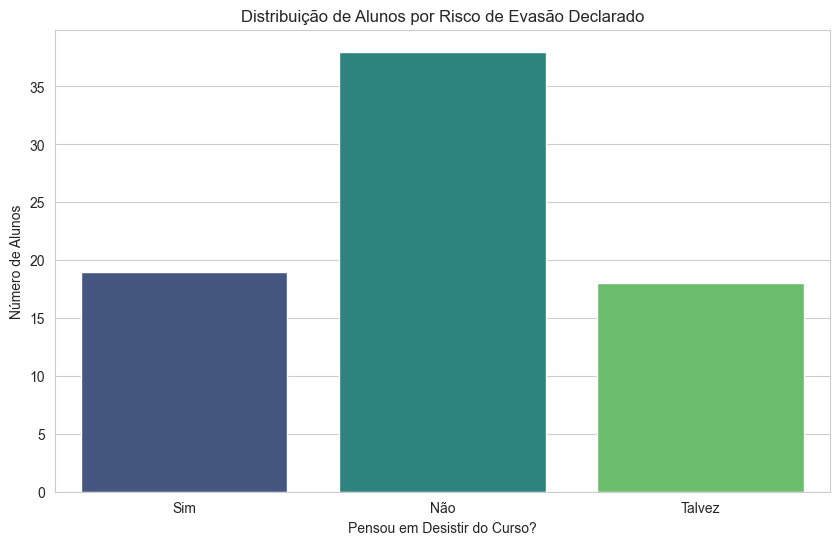


--- Análise 2: Risco de Evasão por Curso ---


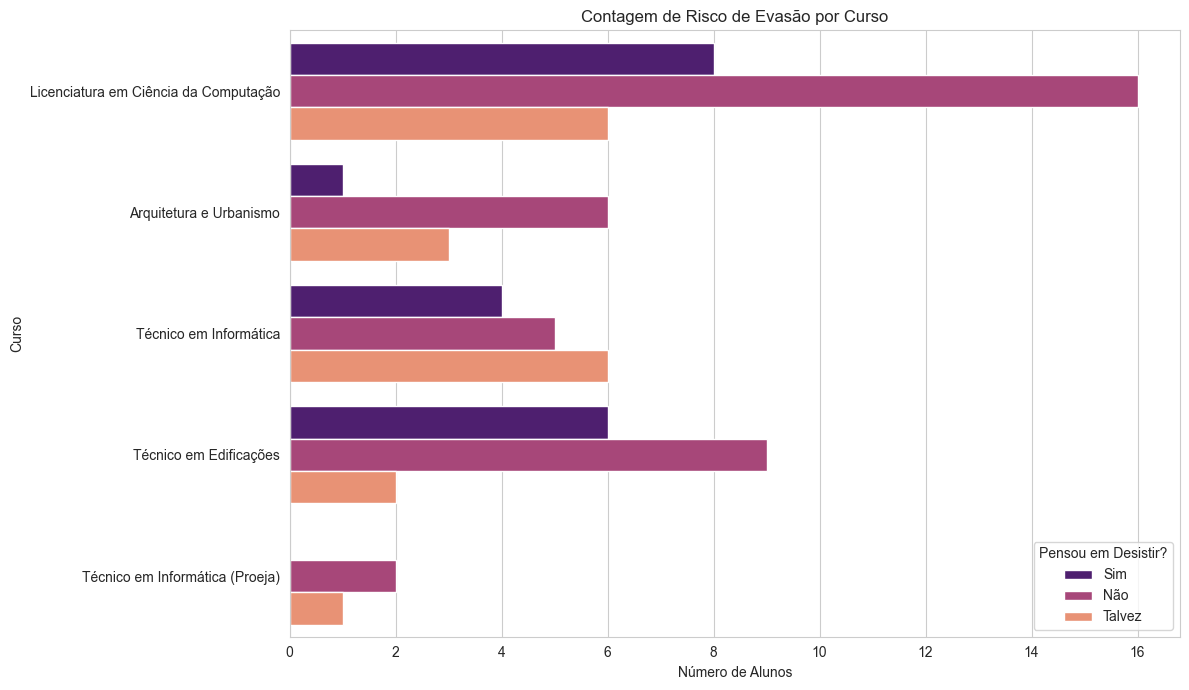


--- Análise 3: Risco de Evasão por Período ---


C:\Users\katys\AppData\Local\Temp\ipykernel_17252\3248091961.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='risco_evasao_declarado', y='periodo', data=df, order=['Sim', 'Não', 'Talvez'], palette='coolwarm')


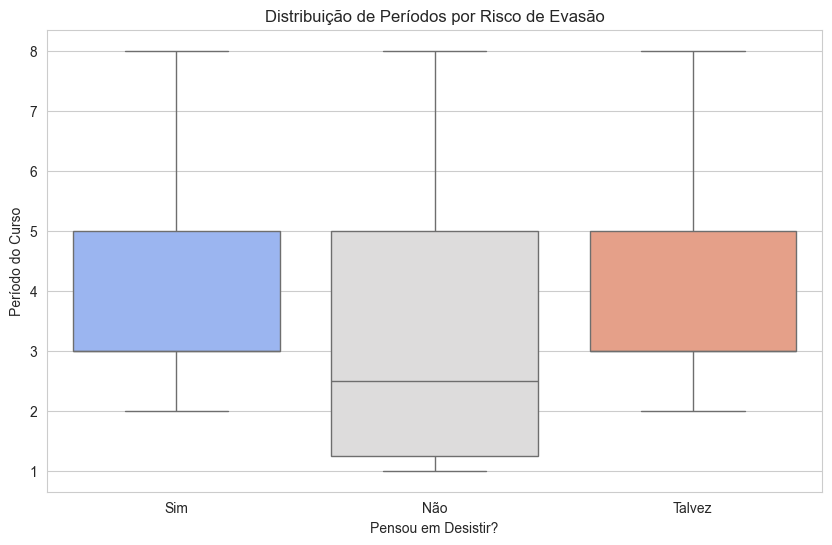

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- Passo 1: Carregar os Dados Limpos ---

# Define o caminho para o arquivo de dados limpos
caminho_dados_limpos = os.path.join('..', 'data', 'dados_limpos.csv')

try:
    df = pd.read_csv(caminho_dados_limpos)
    print("Arquivo de dados limpos carregado com sucesso!")
except FileNotFoundError:
    print(f"Erro: Arquivo não encontrado em '{caminho_dados_limpos}'.")
    print("Certifique-se de que o arquivo 'dados_limpos.csv' foi gerado na pasta 'data'.")

# --- Passo 2: Análise e Visualização ---

# Define um estilo visual mais agradável para os gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Define um tamanho padrão para os gráficos

# --- Gráfico 1: Distribuição do Risco de Evasão ---
print("\n--- Análise 1: Distribuição Geral do Risco de Evasão ---")
total_alunos = len(df)
risco_counts = df['risco_evasao_declarado'].value_counts()
print(f"Total de Alunos na Amostra: {total_alunos}")
print(risco_counts)

plt.figure() # Cria uma nova figura para o gráfico
sns.countplot(x='risco_evasao_declarado', data=df, order=['Sim', 'Não', 'Talvez'], palette='viridis')
plt.title('Distribuição de Alunos por Risco de Evasão Declarado')
plt.xlabel('Pensou em Desistir do Curso?')
plt.ylabel('Número de Alunos')
plt.show()


# --- Gráfico 2: Risco de Evasão por Curso ---
print("\n--- Análise 2: Risco de Evasão por Curso ---")
# Usamos 'hue' para criar barras lado a lado para cada categoria de risco
plt.figure(figsize=(12, 7)) # Aumenta o tamanho para melhor visualização
sns.countplot(y='curso', hue='risco_evasao_declarado', data=df, palette='magma')
plt.title('Contagem de Risco de Evasão por Curso')
plt.xlabel('Número de Alunos')
plt.ylabel('Curso')
plt.legend(title='Pensou em Desistir?')
plt.tight_layout() # Ajusta o layout para não cortar os nomes
plt.show()


# --- Gráfico 3: Risco de Evasão por Período ---
print("\n--- Análise 3: Risco de Evasão por Período ---")
# Boxplot é excelente para ver a distribuição dos períodos para cada grupo
plt.figure()
sns.boxplot(x='risco_evasao_declarado', y='periodo', data=df, order=['Sim', 'Não', 'Talvez'], palette='coolwarm')
plt.title('Distribuição de Períodos por Risco de Evasão')
plt.xlabel('Pensou em Desistir?')
plt.ylabel('Período do Curso')
plt.show()